## Regressão linear simples

Importando as bibliotecas que serão utilizadas, sklearn para criar o modelo de regressão e yellowbrick para visualização de residuais

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Carregando a base de dados

In [2]:
base = pd.read_csv("https://raw.githubusercontent.com/audreyemmely/ds-udemy/master/RegressaoLinear/dados/cars.csv")
base.shape

(50, 3)

In [3]:
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [4]:
base = base.drop(['Unnamed: 0'], axis = 1)
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


Definindo as variáveis X e Y, X distância é a variável independente e Y velocidade é a variável dependente

In [5]:
X = base.iloc[:, 1].values
y = base.iloc[:, 0].values
X

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85])

Calculando correlação entre X e Y

In [6]:
correlacao = np.corrcoef(X, y)
correlacao

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [7]:
#Formato de matriz com uma coluna a mais
X = X.reshape(-1, 1)

Criando modelo e executando treinamento

In [8]:
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Visualizando os coeficientes

In [9]:
modelo.intercept_

8.283905641787172

In [10]:
modelo.coef_

array([0.16556757])

Gerando gráficos com os pontos reais e as previsões

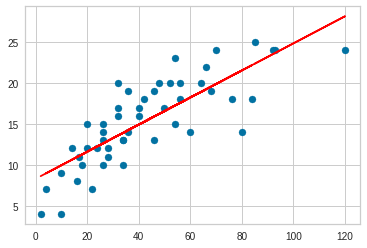

In [11]:
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color = 'red')
plt.show()

Prevendo a "distância 22 pés" usando a fórmula manual
(interceptação + inclinação * valor de dist)

Qual velocidade se levou 22 pés para parar?

In [12]:
modelo.intercept_ + modelo.coef_ * 22

array([11.92639228])

Prevendo utilizando a função do sklearn

In [13]:
modelo.predict([[22]])

array([11.92639228])

Gráfico para visualizar os residuais

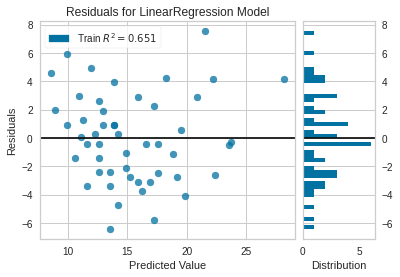

In [14]:
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()